In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Fourier Series

The Fourier series is a powerful mathematical tool used to represent a wide range of periodic functions in terms of a sum of sines and cosines. It's a fundamental concept in mathematical analysis and signal processing, allowing complex periodic signals to be broken down into simpler components.

### Representation

The general form of a Fourier series for a periodic function $f(t)$ is given as:

$$
f(t) = \frac{a_0}{2} + \sum_{n=1}^{+\infty} \left( a_n \cos(n\omega_0 t) + b_n \sin(n\omega_0 t) \right)
$$

Where:
- $a_0$ is the DC (direct current) or average component of the signal.
- $a_n$ and $b_n$ are coefficients that determine the amplitudes of the cosine and sine components at the $n$-th harmonic.
- $\omega_0$ represents the fundamental angular frequency of the periodic signal (in radians per second).

### Coefficients

The coefficients $a_0$, $a_n$, and $b_n$ are computed using the following expressions:

- $a_0$ is calculated as the average value of the function over one period:

$$
a_0 = \frac{1}{T} \int_{0}^{T} f(t) \, dt
$$

- $a_n$ and $b_n$ are determined by integrating the product of the function $f(t)$ and the cosine or sine components over one period:

$$
a_n = \frac{2}{T} \int_{0}^{T} f(t) \cos(n\omega_0 t) \, dt
$$

$$
b_n = \frac{2}{T} \int_{0}^{T} f(t) \sin(n\omega_0 t) \, dt
$$

### Fundamental Angular Frequency

The fundamental angular frequency $\omega_0$ is a fundamental parameter that characterizes the periodicity of the signal. It is related to the fundamental frequency $f_0$ (the number of cycles per second, measured in Hertz) by the formula:

$$
\omega_0 = 2\pi f_0
$$


Example: 

Consider the periodic signal $f(t) = \sum_{n=1}^{4} A \sin(n 2 \pi f_0 t)$, for $f_0 = 1$ Hz. 

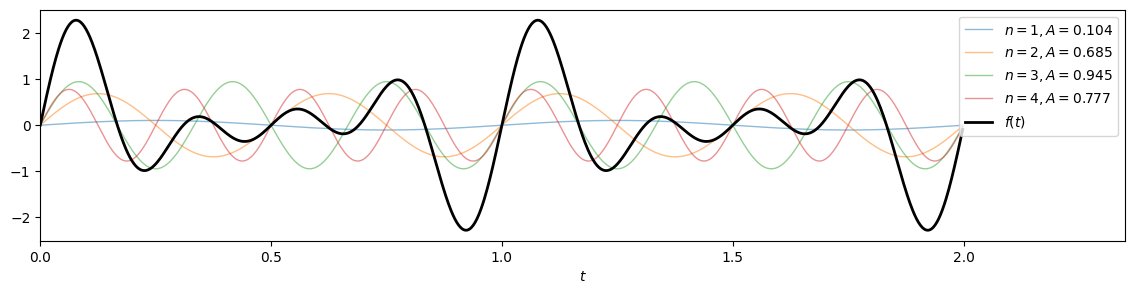

In [4]:
plt.figure(figsize=(14, 3))

N = 1000  # sample points
freq = 1 # fundamental frequency in Hertz
amps = 2 * np.random.rand(4)
ns = np.arange(1, 5)
t = np.linspace(0.0, 2.0, N, endpoint=False)
f_t_all = []

for n, amp in zip(ns, amps):
   f_t = amp * np.sin(n* 2 * np.pi * freq * t)
   f_t_all.append(f_t)
   plt.plot(t, f_t, "-", label=f"$n = {n}, A = {amp:.3f}$", linewidth=1, alpha=0.5)

f_t = np.array(f_t_all).sum(axis=0)
plt.plot(t, f_t, label=f"$f(t)$", linewidth=2, color="k")
plt.xlabel("$t$")
plt.xlim([0, 2.35])
plt.legend()
plt.show()

Note that in this context, the period of $f(t)$ is the same as the period of the component with the lowest frequency ($1/f_0$ = 1s). This comprise half of the data int the example ($N/2$ samples).

In [5]:
dt = t[1] - t[0]
T = 1 / freq
a0 = 2 / T * np.sum(f_t[:N//2] * dt)
for n in ns:
   an = 2 / T * np.sum(f_t[:N//2] * np.cos(n * 2 * np.pi * freq * t[:N//2]) * dt)
   bn = 2 / T * np.sum(f_t[:N//2] * np.sin(n * 2 * np.pi * freq * t[:N//2]) * dt)
   print(f"$a{n}={an:.2f} \t b{n}={bn:.3f}$")

$a1=-0.00 	 b1=0.104$
$a2=-0.00 	 b2=0.685$
$a3=-0.00 	 b3=0.945$
$a4=-0.00 	 b4=0.777$
